# ArcGIS Python API Test

In [1]:
from arcgis import *
from IPython.display import display
import getpass

In [2]:
username = getpass.getuser()

NameError: name 'getpass' is not defined

In [4]:
password = getpass.getpass()

········


In [5]:
gis = GIS("https://mpi.maps.arcgis.com", username, password)

In [6]:
map = gis.map("New Zealand", zoomlevel = 5)
map

MapView(layout=Layout(height='400px', width='100%'), zoom=5.0)

<Item title:"PMTV_InitialDraftSurvey" type:Feature Layer Collection owner:Survey123_MPI>
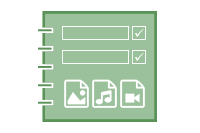

In [7]:
PMTV_UAT = gis.content.search("PMTV_InitialDraftSurvey", item_type = "feature service", outside_org = False)[0]
PMTV_UAT

In [8]:
map.add_layer(PMTV_UAT)

In [9]:
PMTV_UAT_layers = PMTV_UAT.layers
PMTV_UAT_layers

[<FeatureLayer url:"https://services2.arcgis.com/28amRQMPTiEvaF1p/arcgis/rest/services/service_c1a4112eafe74329acc50113f745f35f/FeatureServer/0">,
 <FeatureLayer url:"https://services2.arcgis.com/28amRQMPTiEvaF1p/arcgis/rest/services/service_c1a4112eafe74329acc50113f745f35f/FeatureServer/1">]

In [10]:
for layer in PMTV_UAT_layers:
    print(layer.properties.name)

PMTV_InitialDraftSurvey
SampleCollection


In [11]:
from arcgis.features import FeatureLayerCollection

In [12]:
SampleCollectionFS = PMTV_UAT_layers[1]
print(SampleCollectionFS)
print(type(SampleCollectionFS))

<FeatureLayer url:"https://services2.arcgis.com/28amRQMPTiEvaF1p/arcgis/rest/services/service_c1a4112eafe74329acc50113f745f35f/FeatureServer/1">
<class 'arcgis.features.layer.FeatureLayer'>


In [13]:
for f in SampleCollectionFS.properties.fields:
    print(f['name'])

objectid
globalid
SiteName_h
SiteContactFirstName_h
SiteContactLastName_h
SiteContactPhoneNumber_h
SiteContactCellNumber_h
SiteContactFaxNumber_h
SiteAddrLine1_h
SiteAddrLine2_h
SiteAddrLine3_h
SiteAddrComment_h
SiteType_h
SiteAgribaseID_h
SiteLINZParcelID_h
VisitSampleCollectorFirstName
VisitSampleCollectorLastName
VisitSampleCollectorMPIID
VisitSampleCollectorAGOLUser
VisitSampleCollectorEmail
VisitSampleCollectorPhoneNumber
VisitSampleCollectorCellNumber
VisitDate
VisitDateString
SampleGrowerCompany
SampleGrowerContact1FirstName
SampleGrowerContact1LastName
SampleGrowerContact1Role
SampleGrowerContact1PhoneNumber
SampleGrowerContact1CellNumber
SampleGrowerContact1FaxNumber
SampleGrowerContact1AddrLine1
SampleGrowerContact1AddrLine2
SampleGrowerContact1AddrLine3
SampleGrowerContact2
SampleGrowerContact2FirstName
SampleGrowerContact2LastName
SampleGrowerContact2Role
SampleGrowerContact2Role_other
SampleGrowerContact2PhoneNumber
SampleGrowerContact2CellNumber
SampleGrowerContact2FaxNum

In [14]:
query_result1 = SampleCollectionFS.query(where='LabResult1 IS NOT NULL', out_fields='objectid,VisitSampleCollectorFirstName,SampleGrowerCompany,LabResult1')

In [15]:
query_result1.sdf

,LabResult1,SHAPE,SampleGrowerCompany,VisitSampleCollectorFirstName,objectid
0,"""Awaiting Result""","{""x"": 174.78272016176467, ""y"": -41.27324416305...",Timaru Potatoes,Test,6
1,"""Awaiting Result""","{""x"": 174.78852292549757, ""y"": -36.85509373045...",,Teat,7
2,"""Awaiting Result""","{""x"": 174.85880157851767, ""y"": -36.89003021667...",,Test,8
3,"""Awaiting Result""","{""x"": 174.7879940552402, ""y"": -41.261819042303...",Parnell Farms,Test,9
4,"""Awaiting Result""","{""x"": 174.7920959910143, ""y"": -41.258297804781...",Parnell Farms,Test,10
5,"""Awaiting Result""","{""x"": 174.79461709985023, ""y"": -41.25669476579...",Parnell Farms,Test,11
6,sIP99,"{""x"": 19457369.365736436, ""y"": -4418927.922851...",None,None,13
7,IP98,"{""x"": 19465192.75483405, ""y"": -4423789.4829146...",None,None,14


In [16]:
SampleCollectionFS.properties.capabilities

'Create,Query,Update,Editing,Extract'

In [17]:
#bring back all
SampleCollectionFSet = SampleCollectionFS.query(return_all_records = True)
SampleCollectionFSet.sdf

,CreationDate,Creator,EditDate,Editor,LabResult1,LabResult2,LabResult3,NewSampleNote,PMTVQ_Result,PMTV_Result,...,VisitSampleCollectorFullName,VisitSampleCollectorLIMSID,VisitSampleCollectorLastName,VisitSampleCollectorMPIID,VisitSampleCollectorPhoneNumber,VisitSampleCollectorPrimNumber,VisitSampleCollectorSecNumber,globalid,objectid,parentglobalid
0,1970-01-01 00:25:38.034914,Andrew.Parnell_MPI,1970-01-01 00:25:38.034914,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,12345.0,None,0216789778,None,6bd241dd-e085-4a21-9789-4aafa6cb1652,6,4df8fe9d-55df-4161-9627-c7d4a938d1f6
1,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Teat Tester,None,Tester,12345.0,None,0228484729,None,3c70e6c5-a4fe-4ff8-bc61-49ee6191b7ce,7,c7e94440-5bcf-4383-9ad0-37509b2dd959
2,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,123345.0,None,023479289,None,92a0ead7-e078-4a23-8ca5-5036a1654a03,8,c7e94440-5bcf-4383-9ad0-37509b2dd959
3,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,124638.0,None,022374858,None,79491e00-e5b9-466e-b223-53307269ce4b,9,e4212890-667d-4199-8674-e7ca989f4f2f
4,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,13748.0,None,0274749398,None,f14f8d65-e77b-4893-a44d-eda701e97335,10,e4212890-667d-4199-8674-e7ca989f4f2f
5,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,17383.0,None,26384,None,fbcd78d0-6b07-4f85-bfff-c5536200c5ac,11,e4212890-667d-4199-8674-e7ca989f4f2f
6,1970-01-01 00:25:38.600585,Andrew.Parnell_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,None,None,None,None,None,None,...,None,None,None,NaN,None,None,021021021,9d8e2d94-5cf4-4c5a-9cf0-9344ae5656d3,12,None
7,1970-01-01 00:25:38.601488,Survey123_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,sIP99,None,None,None,Positive,Positive,...,None,None,None,NaN,None,None,021021021,0a799a50-b01e-40f4-a288-431f1a7d1bdc,13,None
8,1970-01-01 00:25:38.601488,Survey123_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,IP98,None,None,None,Negative,Positive,...,None,None,None,NaN,None,None,021021021,96121a25-04dd-4939-9e72-5720a396bdf9,14,None
9,1970-01-01 00:25:38.601817,Andrew.Parnell_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,None,None,None,None,None,None,...,None,None,None,NaN,None,None,021021021,82209f03-2f62-44a6-8143-f75783b963c9,15,None


In [18]:
SampleFeatures = SampleCollectionFSet.features

In [19]:
SecNumber_features = [f for f in SampleFeatures if f.attributes['VisitSampleCollectorPrimNumber']==None]

In [20]:
len(SecNumber_features)

4

In [21]:
SecNumber_features

[{"geometry": {"x": 174.7974261339218, "y": -41.24505412396048, "spatialReference": {"wkid": 4326, "latestWkid": 4326}}, "attributes": {"objectid": 12, "globalid": "9d8e2d94-5cf4-4c5a-9cf0-9344ae5656d3", "SiteName_h": null, "SiteContactFirstName_h": null, "SiteContactLastName_h": null, "SiteContactPhoneNumber_h": null, "SiteContactCellNumber_h": null, "SiteContactFaxNumber_h": null, "SiteAddrLine1_h": null, "SiteAddrLine2_h": null, "SiteAddrLine3_h": null, "SiteAddrComment_h": null, "SiteType_h": null, "SiteAgribaseID_h": null, "SiteLINZParcelID_h": null, "VisitSampleCollectorFirstName": null, "VisitSampleCollectorLastName": null, "VisitSampleCollectorMPIID": null, "VisitSampleCollectorAGOLUser": null, "VisitSampleCollectorEmail": null, "VisitSampleCollectorPhoneNumber": null, "VisitSampleCollectorCellNumber": null, "VisitDate": null, "VisitDateString": null, "SampleGrowerCompany": null, "SampleGrowerContact1FirstName": null, "SampleGrowerContact1LastName": null, "SampleGrowerContact1R

In [22]:
SecNumber_features_edit = SecNumber_feature 
for f in SecNumber_features_edit:
    f.attributes['VisitSampleCollectorSecNumber'] = '021021021'

NameError: name 'SecNumber_feature' is not defined

In [ ]:
SecNumber_features_edit

In [ ]:
SampleCollectionFS.edit_features(updates=SecNumber_features_edit)

In [23]:
SampleCollectionFSet.sdf
#winning

,CreationDate,Creator,EditDate,Editor,LabResult1,LabResult2,LabResult3,NewSampleNote,PMTVQ_Result,PMTV_Result,...,VisitSampleCollectorFullName,VisitSampleCollectorLIMSID,VisitSampleCollectorLastName,VisitSampleCollectorMPIID,VisitSampleCollectorPhoneNumber,VisitSampleCollectorPrimNumber,VisitSampleCollectorSecNumber,globalid,objectid,parentglobalid
0,1970-01-01 00:25:38.034914,Andrew.Parnell_MPI,1970-01-01 00:25:38.034914,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,12345.0,None,0216789778,None,6bd241dd-e085-4a21-9789-4aafa6cb1652,6,4df8fe9d-55df-4161-9627-c7d4a938d1f6
1,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Teat Tester,None,Tester,12345.0,None,0228484729,None,3c70e6c5-a4fe-4ff8-bc61-49ee6191b7ce,7,c7e94440-5bcf-4383-9ad0-37509b2dd959
2,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,1970-01-01 00:25:38.035551,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,123345.0,None,023479289,None,92a0ead7-e078-4a23-8ca5-5036a1654a03,8,c7e94440-5bcf-4383-9ad0-37509b2dd959
3,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,124638.0,None,022374858,None,79491e00-e5b9-466e-b223-53307269ce4b,9,e4212890-667d-4199-8674-e7ca989f4f2f
4,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,13748.0,None,0274749398,None,f14f8d65-e77b-4893-a44d-eda701e97335,10,e4212890-667d-4199-8674-e7ca989f4f2f
5,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,1970-01-01 00:25:38.036562,Andrew.Parnell_MPI,"""Awaiting Result""","""Awaiting Result""","""Awaiting Result""",None,"""Awaiting Result""","""Awaiting Result""",...,Test Tester,None,Tester,17383.0,None,26384,None,fbcd78d0-6b07-4f85-bfff-c5536200c5ac,11,e4212890-667d-4199-8674-e7ca989f4f2f
6,1970-01-01 00:25:38.600585,Andrew.Parnell_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,None,None,None,None,None,None,...,None,None,None,NaN,None,None,021021021,9d8e2d94-5cf4-4c5a-9cf0-9344ae5656d3,12,None
7,1970-01-01 00:25:38.601488,Survey123_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,sIP99,None,None,None,Positive,Positive,...,None,None,None,NaN,None,None,021021021,0a799a50-b01e-40f4-a288-431f1a7d1bdc,13,None
8,1970-01-01 00:25:38.601488,Survey123_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,IP98,None,None,None,Negative,Positive,...,None,None,None,NaN,None,None,021021021,96121a25-04dd-4939-9e72-5720a396bdf9,14,None
9,1970-01-01 00:25:38.601817,Andrew.Parnell_MPI,1970-01-01 00:25:39.154614,Andrew.Parnell_MPI,None,None,None,None,None,None,...,None,None,None,NaN,None,None,021021021,82209f03-2f62-44a6-8143-f75783b963c9,15,None
